# Regression and Gradient Descent

Before we start, let's load some packages: [numpy](https://numpy.org) (for matrix manipulations), [cvxpy](https://www.cvxpy.org) (convex optimisation) and [matplotlib](https://matplotlib.org) (plotting).

Note: if you are using anaconda python you may not have cvxpy installed by default. Install it using the command ``conda install -c conda-forge cvxpy``. You may also need to install matplotlib using ``conda install matplotlib``.

In [4]:
import numpy as np
from cvxpy import *
import matplotlib.pyplot as plt

## Analysing a dataset

Imagine we have some data taken from an experiment and we would like to find a model that fits the data well.

Here is some data I took earlier. Can you figure out a good model for this data? How would you verify that your model is a good fit for the data?

In [5]:
data = np.array([
 [0.0, 3.35982],
 [0.5, 4.45784],
 [1.0, 4.98725],
 [1.5, 5.92751],
 [2.0, 6.99903],
 [2.5, 8.37272],
 [3.0, 9.22212],
 [3.5, 9.72170],
 [4.0, 11.0244],
 [4.5, 11.7995],
 [5.0, 13.0831]])

The first thing we should do is try to plot the data to see if we can recognise anything

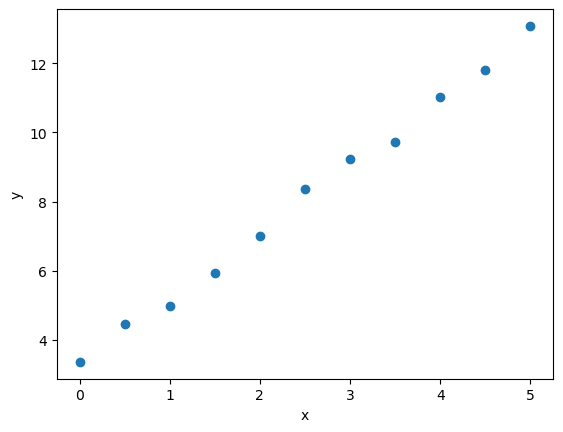

In [6]:
p1 = plt.plot(data[:,0],data[:,1],'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

If we have a good idea for a model that might fit the data, then we can use _regression_ to look for the parameters that best fit the data. In this case it looks like we should consider a straight line $y(x)= \beta_1 x + \beta_0$ as a model. To fit the model to the data, we can use our data samples to write an (overdetermined) linear system of equations $ X \beta = y$, where
$$ X = \begin{pmatrix} 1 & x_1 \\ \vdots & \vdots \\ 1 & x_n \end{pmatrix}, \quad y = \begin{pmatrix} y_1 \\ \vdots \\ y_n \end{pmatrix}, \quad \beta = \begin{pmatrix} \beta_0 \\ \beta_1 \end{pmatrix}$$
The matrix $X$ is an example where we have many rows but only two columns so this is an **over-constrained** problem (equivalently, the points don't all sit exactly on a line). As such we won't be able to find a perfect solution ($y$ is not in the column space of $X$). Instead, we can try to find the line that "best" fits the data. If we define "best" to mean the line that minimises the square of the 2-norm $||X\beta - y||^2$ then this leads us to regression, in which we instead solve the system $X^T X \beta = X^T y$, which does have a solution for $\beta_0$ and $\beta_1$. 

To formulate this as an optimisation problem, consider the system of equations:
$$ y = X \begin{pmatrix} a \\ b \end{pmatrix} + \epsilon$$
where $\epsilon$ is a vector of vertical distances of the points from the best fit line.
Then, the optimisation problem is
$$\min_{\beta} || \epsilon ||^2$$

The optimisation problem can be easily solved via the gradient descent method.
The idea is to start from a given approximation $\beta^{(0)}$ and to update it following the direction of the antigradient, which is the direction of steepest descent of the objective function at each point. The process generates a sequence of solution estimates $\{\beta^{(k)}\}$ which, under certain hypotheses, converges to the true solution.

First, let's construct the matrix $X$ and vector $y$:

In [7]:
n = data.shape[0]
X = np.concatenate((np.ones((n,1)),data[:,0:1]),axis=1)
y = data[:,1]

## Tasks

1. Solve this using gradient descent with the optimal step-size.
2. Solve this problem using cvxpy.

### Task 1

In [9]:
XT=X.transpose()

In [10]:
x0 =np.array([0,0])

In [11]:
r0 = XT @(y - X@x0)
alpha0 = (np.linalg.norm(r0)/np.linalg.norm(X@r0))**2
x1 = x0 - alpha0*XT@(X@x0 - y)

In [12]:
r1 = XT @(y - X@x1)
alpha1 = (np.linalg.norm(r1)/np.linalg.norm(X@r1))**2
x2 = x1 - alpha1*XT@(X@x1 - y)

In [13]:
r2 = XT @(y - X@x2)
alpha2 = (np.linalg.norm(r2)/np.linalg.norm(X@r2))**2
x3 = x2 - alpha2*XT@(X@x2 - y)

In [14]:
r3 = XT @(y - X@x3)
alpha3 = (np.linalg.norm(r3)/np.linalg.norm(X@r3))**2
x4 = x3 - alpha3*XT@(X@x3 - y)

In [15]:
steps = np.array([x0,x1,x2,x3,x4]).transpose()

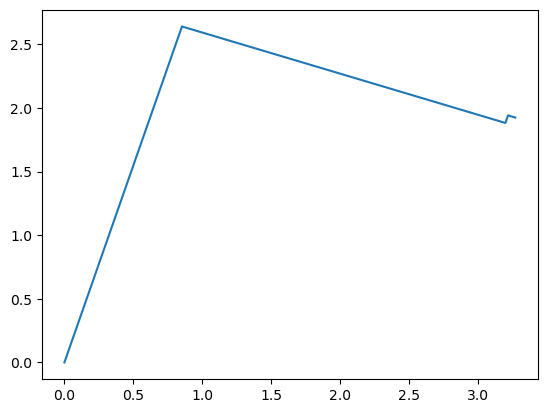

In [16]:
plt.plot(steps[0],steps[1])

### Task 2

In [17]:
# Create a (2) vector of variables
Beta = Variable(2)

# Create sum-of-squares objective function
objective = Minimize(sum(square(X@Beta - y)))

# Create problem and solve it
prob = Problem(objective)
prob.solve()

print("status: ", prob.status)
print("optimal value: ", prob.value)
print("optimal variables: ", Beta[0].value, Beta[1].value)

status:  optimal
optimal value:  0.4226319631854529
optimal variables:  3.2729100000000004 1.9255629090909088
